In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import get_data
import matplotlib.pyplot as plt
import population_activity as pop
import helper_functions as hf
import analysis
import plots
import statistics_test as st
from IPython.display import display

c:\Users\Ole\anaconda3\envs\spyder-env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


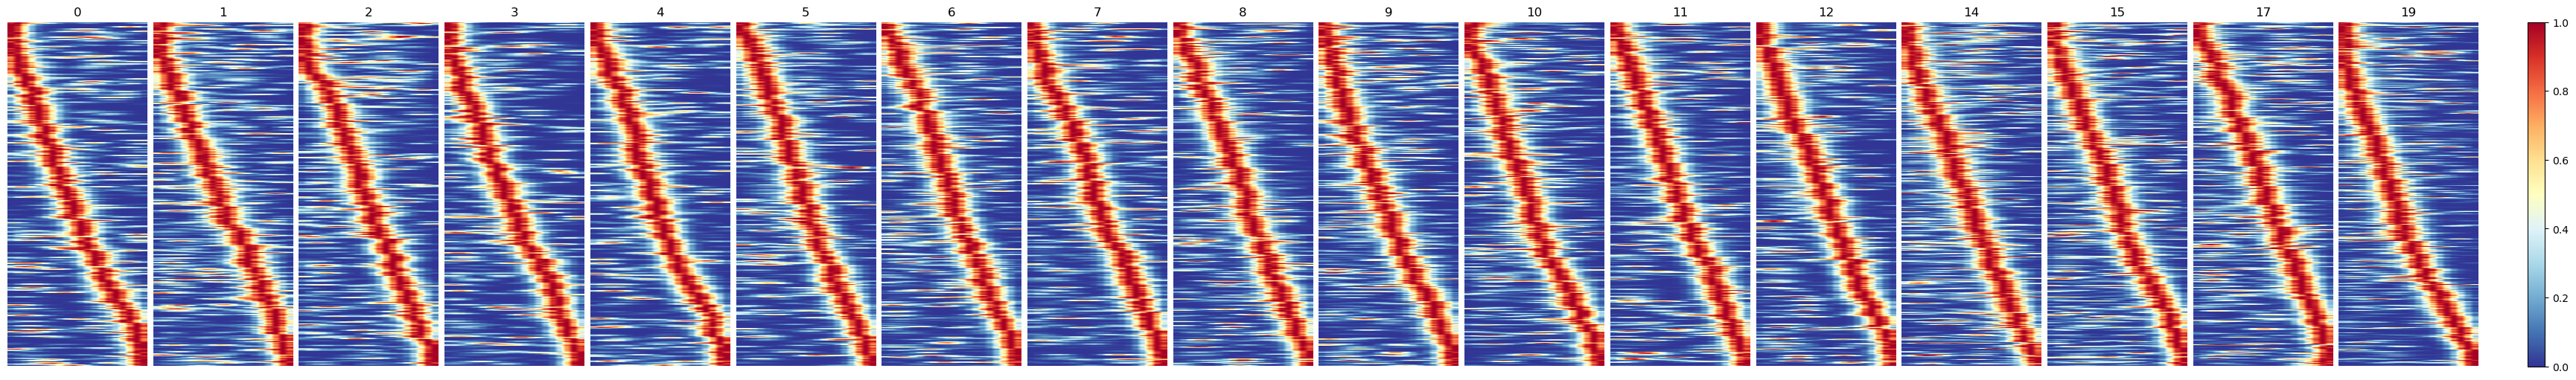

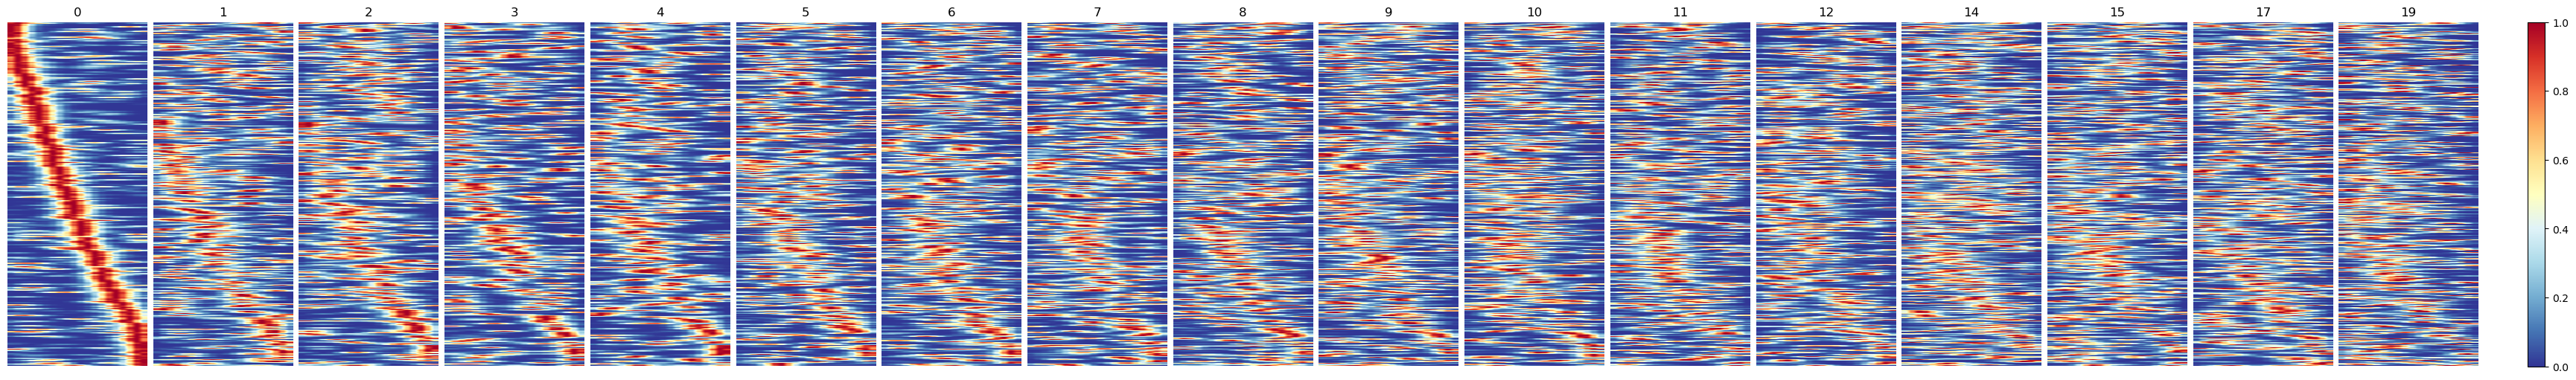

In [2]:
datapath = r'D:/Antje_CA1/data_sig/170.h5'
maps = [str(i) for i in np.arange(1, 13)] +  ['14', '15', '17', '19']
hist_sorts = analysis.sort_maps_from_reference_AK(datapath, 'Context1', reference='0', maps = maps, reference_type='own_reference', transients = False, hist='hist',  standardize='stand')
plots.plot_arrays(hist_sorts, ['0']+maps, remove_zero_rows=True)

hist_sorts = analysis.sort_maps_from_reference_AK(datapath, 'Context1', reference='0', maps = maps, reference_type='reference', transients = False, hist='hist',  standardize='stand')
plots.plot_arrays(hist_sorts, ['0']+maps,remove_zero_rows=True)

In [3]:
datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 'D:/Antje_CA1/data_sig/51007.h5', 'D:/Antje_CA1/data_sig/63.h5', 'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']

results = []

for datapath in datapaths:
    scores_test, scores_new_list, predictions_test, predictions_new_list, y_test, y_new_list = analysis.decode_position(
        datapath, '0', maps, 'Context1', model='gnb', use_circular=False, align_sessions=False)
    
    results.append({
        'datapath': datapath,
        'scores_test': scores_test,
        'scores_new_list': scores_new_list,
        'predictions_test': predictions_test,
        'predictions_new_list': predictions_new_list,
        'y_test': y_test,
        'y_new_list': y_new_list
    })

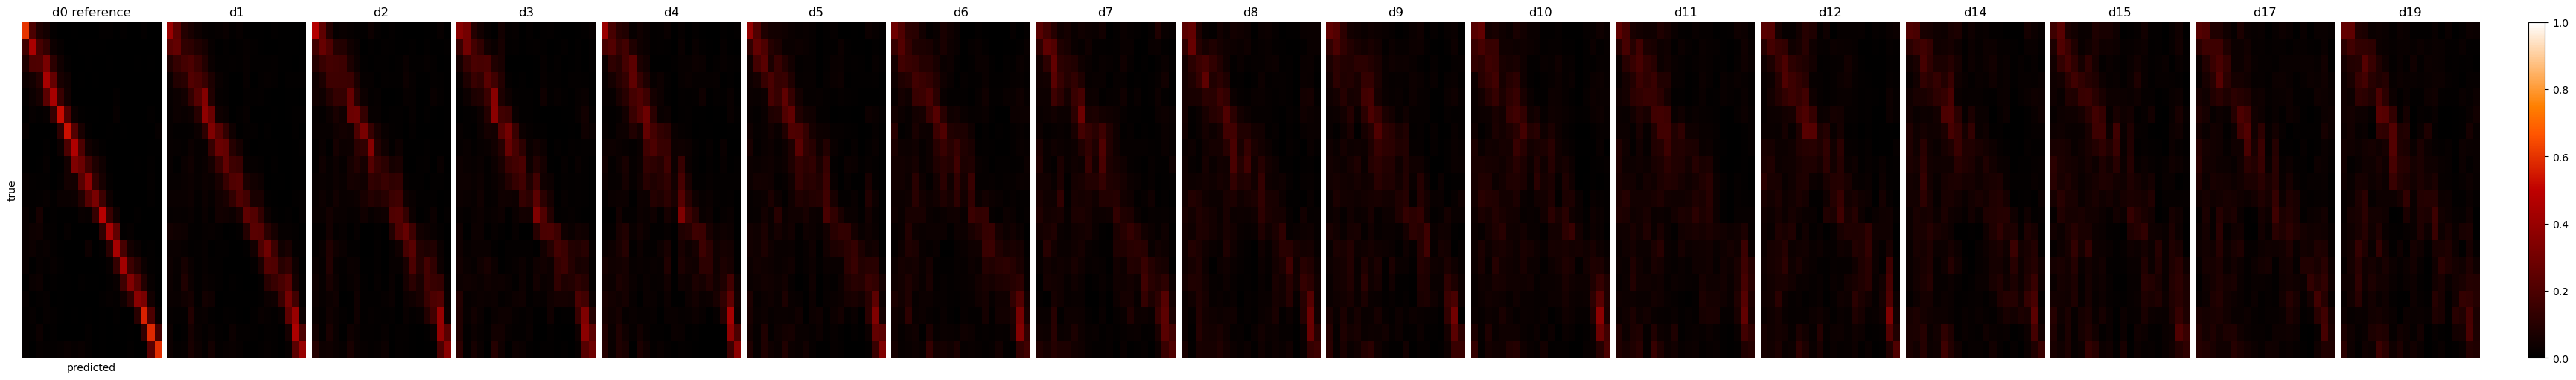

In [4]:
num_days = len(results[0]['scores_new_list'])
matrix_shape = results[0]['scores_new_list'][0]['cm_prob'].shape
sum_matrices = [np.zeros(matrix_shape) for _ in range(num_days)]
days = ['d0 reference', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd14', 'd15', 'd17', 'd19']
for a in range(len(results)):
    for day in range(num_days):
        sum_matrices[day] += results[a]['scores_new_list'][day]['cm_prob']

num_a = len(results)
avg_matrices = [sum_matrix / num_a for sum_matrix in sum_matrices]

avg_matrice_ref = np.mean([results[a]['scores_test']['cm_prob'] for a in range(len(results)) ],axis=0)
avg_matrices.insert(0, avg_matrice_ref)
plots.plot_arrays(avg_matrices, days, aspect=0.0, xlabel='predicted', ylabel='true', show_colorbar=True, smooth_sigma=False, remove_zero_rows=False, cmap='gist_heat', global_scale=True, scale_per_neuron=False)

In [5]:
results_shuff = []

for datapath in datapaths:
    scores_test, scores_new_list, predictions_test, predictions_new_list, y_test, y_new_list = analysis.decode_position(
        datapath, '0', maps, 'Context1', model='gnb', use_circular=False, align_sessions=False, shuffle=True)
    
    results_shuff.append({
        'datapath': datapath,
        'scores_test': scores_test,
        'scores_new_list': scores_new_list,
        'predictions_test': predictions_test,
        'predictions_new_list': predictions_new_list,
        'y_test': y_test,
        'y_new_list': y_new_list
    })

Source          SS  ddof1  ddof2          MS          F  \
0              time   52.372200     16     80    3.273262  29.866128   
1         condition  307.188704      1      5  307.188704  24.705229   
2  time * condition   48.606140     16     80    3.037884  18.312849   

          p-unc     p-GG-corr       ng2       eps  
0  4.010545e-27  1.334263e-07  0.285789  0.227460  
1  4.210185e-03  4.210185e-03  0.701230  1.000000  
2  2.189110e-20  5.937006e-05  0.270803  0.170656

Timepoint Condition 1 Condition 2 Test Used  Statistic     p-value  \
0         T1          C1          C2    t-test   -15.0541  2.3427e-05   
1         T2          C1          C2    t-test    -8.5955      0.0004   
2         T3          C1          C2    t-test    -6.2657      0.0015   
3         T4          C1          C2    t-test    -5.2830      0.0032   
4         T5          C1          C2    t-test    -3.4786      0.0177   
5         T6          C1          C2    t-test    -4.2045      0.0085   
6         T7          C1          C2    t-test    -4.1683      0.0088   
7         T8          C1          C2    t-test    -3.5325      0.0167   
8         T9          C1          C2    t-test    -4.4205      0.0069   
9        T10          C1          C2    t-test    -3.7274      0.0136   
10       T11          C1          C2    t-test    -3.3341      0.0207   
11       T12          C1          C2    t-test    -3.9475      0.0109   
12       T13          C1          C2    t-test    -4.2174      0.0083   
13       T14          C1          C2    t-test    -2.9857      0.0306   
14       T15          C1          C2    t-test    -3.1320      0.0259   
15       T16          C1          C2    t-test    -2.7746      0.0392   
16       T17          C1          C2    t-test    -3.5423      0.0165   

   Adjusted p-value (bonferroni) Significance  Effect Size Effect Size Type  \
0                         0.0004          ***      -6.1458        Cohen's d   
1                         0.0060           **      -3.5091        Cohen's d   
2                         0.0258            *      -2.5580        Cohen's d   
3                         0.0550                   -2.1568        Cohen's d   
4                         0.3007                   -1.4201        Cohen's d   
5                         0.1437                   -1.7165        Cohen's d   
6                         0.1488                   -1.7017        Cohen's d   
7                         0.2838                   -1.4421        Cohen's d   
8                         0.1171                   -1.8047        Cohen's d   
9                         0.2313                   -1.5217        Cohen's d   
10                        0.3517                   -1.3611        Cohen's d   
11                        0.1849                   -1.6116        Cohen's d   
12                        0.1419                   -1.7217        Cohen's d   
13                        0.5202                   -1.2189        Cohen's d   
14                        0.4403                   -1.2786        Cohen's d   
15                        0.6656                   -1.1327        Cohen's d   
16                        0.2809                   -1.4461        Cohen's d   

    Mean Cond 1  Mean Cond 2  Mean Diff  SD Diff  N  Normal Dist.  \
0        1.4561       6.4110    -4.9549   0.8062  6          True   
1        2.7171       6.7079    -3.9908   1.1373  6          True   
2        3.1107       6.7823    -3.6716   1.4353  6          True   
3        3.3496       6.6262    -3.2766   1.5192  6          True   
4        3.7432       6.5677    -2.8245   1.9889  6          True   
5        3.8690       6.5767    -2.7077   1.5774  6          True   
6        4.2605       6.6784    -2.4179   1.4209  6          True   
7        4.4119       6.6630    -2.2511   1.5610  6          True   
8        4.6098       6.8163    -2.2064   1.2226  6          True   
9        4.8457       6.6365    -1.7908   1.1769  6          True   
10       4.8039       6.5260    -1.7221   1.2652  6          True   
11       4.8377       6.5723    -1.7346   1.0764  6          True   
12       4.6742       6.7145    -2.0403   1.1851  6          True   
13       5.0402       6.7061    -1.6659   1.3667  6          True   
14       5.1895       6.6052    -1.4157   1.1072  6          True   
15       5.1630       6.5581    -1.3951   1.2317  6          True   
16       4.8936       6.5496    -1.6560   1.1451  6          True   

   Normality p-value  

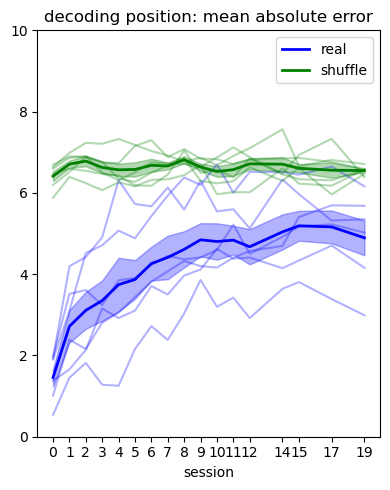

In [6]:

mae_array = np.array([[results[a]['scores_new_list'][day]['mae'] for a in range(len(results))] 
                      for day in range(len(results[0]['scores_new_list']))])
mae_ref= np.array([results[a]['scores_test']['mae'] for a in range(len(results))])
mae_array = np.vstack([mae_ref, mae_array])

mae_array_shuff = np.array([[results_shuff[a]['scores_new_list'][day]['mae'] for a in range(len(results_shuff))]
                            for day in range(len(results_shuff[0]['scores_new_list']))])
mae_ref_shuff= np.array([results_shuff[a]['scores_test']['mae'] for a in range(len(results_shuff))])
mae_array_shuff = np.vstack([mae_ref_shuff, mae_array_shuff])

fig, ax = plt.subplots(1, 1, figsize=(4, 5))
plots.plot_average_geometry([mae_array.T, mae_array_shuff.T], ['0']+maps, colors=['b', 'g'], title='decoding position: mean absolute error', ax=ax, ylim=[0, 10],  labels= ['real', 'shuffle'])
stat1 = st.repeated_measures_anova_general([mae_array.T, mae_array_shuff.T])
display(stat1[0])
display(stat1[1])




In [ ]:
all_before_correlations = []
datapaths = ['D:/Antje_CA1/data_sig/170.h5', 'D:/Antje_CA1/data_sig/51004.h5', 'D:/Antje_CA1/data_sig/51007.h5', 'D:/Antje_CA1/data_sig/63.h5', 'D:/Antje_CA1/data_sig/64.h5', 'D:/Antje_CA1/data_sig/65.h5']

for datapath in datapaths:

    
    hist_sorts = analysis.sort_maps_from_reference_AK(datapath, 'Context1', reference='0', maps = maps, transients = False, hist='hist')
    manifold_reference = hist_sorts[0] 
    manifold_before_rotation = [hist_sorts[day] for day in range(1,len(hist_sorts))]
    before_correlation = [pop.ManifoldAnalysis.population_correlation(manifold_before_rotation[day], manifold_reference) for day in range(len(manifold_before_rotation))]    
    
    w1,w2 =analysis.sort_maps_from_reference_within_session_AK(datapath, 'Context1', maps=['0'])
    within_session_correlation = pop.ManifoldAnalysis.population_correlation(w1[0], w2[0])
    
    before_correlation= [within_session_correlation] + before_correlation
    all_before_correlations.append(before_correlation)



all_before_correlations = np.vstack(all_before_correlations)


Source        SS  DF        MS          F         p-unc       ng2       eps
0   time  1.976429  16  0.123527  60.322068  8.300126e-38  0.769105  0.144635
1  Error  0.163823  80  0.002048        NaN           NaN       NaN       NaN

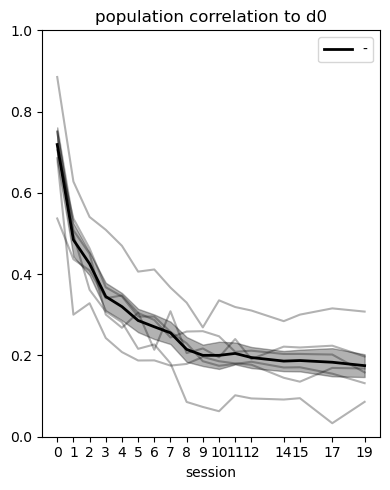

In [8]:

fig, ax = plt.subplots(figsize=(4, 5))
plots.plot_average_geometry([all_before_correlations], ['0']+maps, colors=['k'], ax=ax, title='population correlation to d0', ylim=[0, 1], labels=['-'])
st.repeated_measures_anova_single_condition(all_before_correlations)# included day 0 as